In [1]:
import numpy as np
import dask.dataframe as dd
import pandas as pd
from mlt.default import selector as s
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

root_path = "/home/jovyan/vmldata/raw_source_data/v20180810_all_wearables/"


# Load Anand's data

In [3]:
metadata_df = pd.read_hdf("/home/jovyan/vmldata/tmp_jlc/prod_attr_cat.h5")
#metadata_df = metadata_df[metadata_df["COLORWAY_IMAGE_ROLE_TYPE"] == 'CPRI']
metadata_df.head()

TOP  \
Accessories Type                                                   NaN   
Active Apparel Type                                                NaN   
Age Group                                   IMAGE_FILE ATTR_VAL
185...   
Age Range (Toys)                                                   NaN   
Apparel Occasion                            IMAGE_FILE      ATTR_VA...   

                                                                   HAT  \
Accessories Type                            IMAGE_FILE ATTR_VAL
147...   
Active Apparel Type                                                NaN   
Age Group                                   IMAGE_FILE ATTR_VAL
147...   
Age Range (Toys)                                                   NaN   
Apparel Occasion                            IMAGE_FILE ATTR_VAL
158...   

                                                                  SHOE  \
Accessories Type                                                   NaN   
Active Apparel Type                                                NaN   
Age Group                                   IMAGE_FILE ATTR_VAL
548...   
Age Range (Toys)                                                   NaN   
Apparel Occasion                                                   NaN   

                                                               HANDBAG  \
Accessories Type                            IMAGE_FILE             ...   
Active Apparel Type                                                NaN   
Age Group                                   IMAGE_FILE ATTR_VAL
122...   
Age Range (Toys)                                                   NaN   
Apparel Occasion                                                   NaN   

                                                                 DRESS  \
Accessories Type                                                   NaN   
Active Apparel Type                                                NaN   
Age Group                                   IMAGE_FILE ATTR_VAL
397...   
Age Range (Toys)                            IMAGE_FILE     ATTR_VAL...   
Apparel Occasion                            IMAGE_FILE        ATTR_...   

                                                                 JEANS  \
Accessories Type                                                   NaN   
Active Apparel Type                                                NaN   
Age Group                                   IMAGE_FILE ATTR_VAL
169...   
Age Range (Toys)                                                   NaN   
Apparel Occasion                            IMAGE_FILE      ATTR_VA...   

                                                                 PANTS  \
Accessories Type                                                   NaN   
Active Apparel Type                         IMAGE_FILE          ATT...   
Age Group                                   IMAGE_FILE ATTR_VAL
34 ...   
Age Range (Toys)                                                   NaN   
Apparel Occasion                            IMAGE_FILE      ATTR_VA...   

                                                               SWEATER  \
Accessories Type                                                   NaN   
Active Apparel Type                         IMAGE_FILE          ATT...   
Age Group                                   IMAGE_FILE ATTR_VAL
261...   
Age Range (Toys)                            IMAGE_FILE     ATTR_VAL...   
Apparel Occasion                            IMAGE_FILE      ATTR_VA...   

                                                               T-SHIRT  \
Accessories Type                                                   NaN   
Active Apparel Type                                                NaN   
Age Group                                   IMAGE_FILE ATTR_VAL
215...   
Age Range (Toys)                                                   NaN   
Apparel Occasion                            IMAGE_FILE ATTR_VAL
215...   

                                                              

In [28]:
print("unique images", len(metadata_df))
metadata_df.PRODUCT_TYPE.unique()

unique images 1855001


array(['BEAUTY_TOOL', 'APPAREL', 'PANTS', 'SHORTS', 'JEANS', 'SWIMSUIT',
       'DRESS', 'SHOE', 'SNEAKER', 'BOOT', 'SANDAL', 'SLIPPER', 'PUMP',
       'FLAT', 'COAT', 'HANDBAG', 'SCARF', 'GLOVE', 'HAT', 'SLEEPWEAR',
       'PAJAMA', 'NIGHTGOWNS', 'UNDERWEAR', 'BRA', 'PANTY', 'TOP',
       'T-SHIRT', 'SHIRT', 'JACKET', 'SKIRT', 'RING', 'WATCH', 'EARRINGS',
       'NECKLACE', 'APPLE_WATCH', 'BLANKET', 'BATH', 'TOWEL',
       'COFFEEMAKER', 'SERVEWARE', 'MAKEUP', 'FACE_MAKEUP', 'SKIN_CARE',
       'BODY_CARE', 'FRAGRANCE', 'LUGGAGE', 'BACKPACK_MESSENGER',
       'CANDLESTICKS', 'ELECTRONICS', 'TEA_KETTLE', 'RUG', 'BEDDING',
       'BIKINIS', 'BOXER_BRIEF', 'BOXER', 'CLOCK', 'POLO_SHIRT', 'THONG',
       'UNDERSHIRT', 'NAILS', 'EVERYDAY_GLASSWARE', 'GIFTWARE',
       'FIGURINE', 'FRAMES', 'MISC_GIFTS', 'BABY_SET', 'ONE_PIECE',
       'ORNAMENT', 'DUFFLE', 'HOSIERY', 'ACCESSORIES', 'MULE', 'LOAFERS',
       'OXFORDS', 'OUTFIT', 'AREA_RUG', 'ART', 'SHAPEWEAR', 'TIES',
       'BLAZER', 'CAMI

In [5]:
KEEP_PRODUCT_TYPES = ['SHOE', 'SNEAKER', 'SANDAL', 'SLIPPER', 'PUMP', 'FLAT', 'LOAFERS', 'BOAT_SHOE']

# Visualize Samples

In [8]:
def visualize_samples(product_type):
    
    vis_dataset =  metadata_df[metadata_df["PRODUCT_TYPE"] == product_type]
    fig, axs = plt.subplots(5, 10, figsize=(20, 16))

    for idx in range(len(axs.flatten())):
        path = np.random.choice(vis_dataset.index.values)
        img = cv2.imread(root_path + path)
        if img is None:
            print("errror ", path)
            continue

        img = img[..., ::-1]
        axs.flatten()[idx].imshow(img)
        axs.flatten()[idx].set_title("{}".format(product_type))  


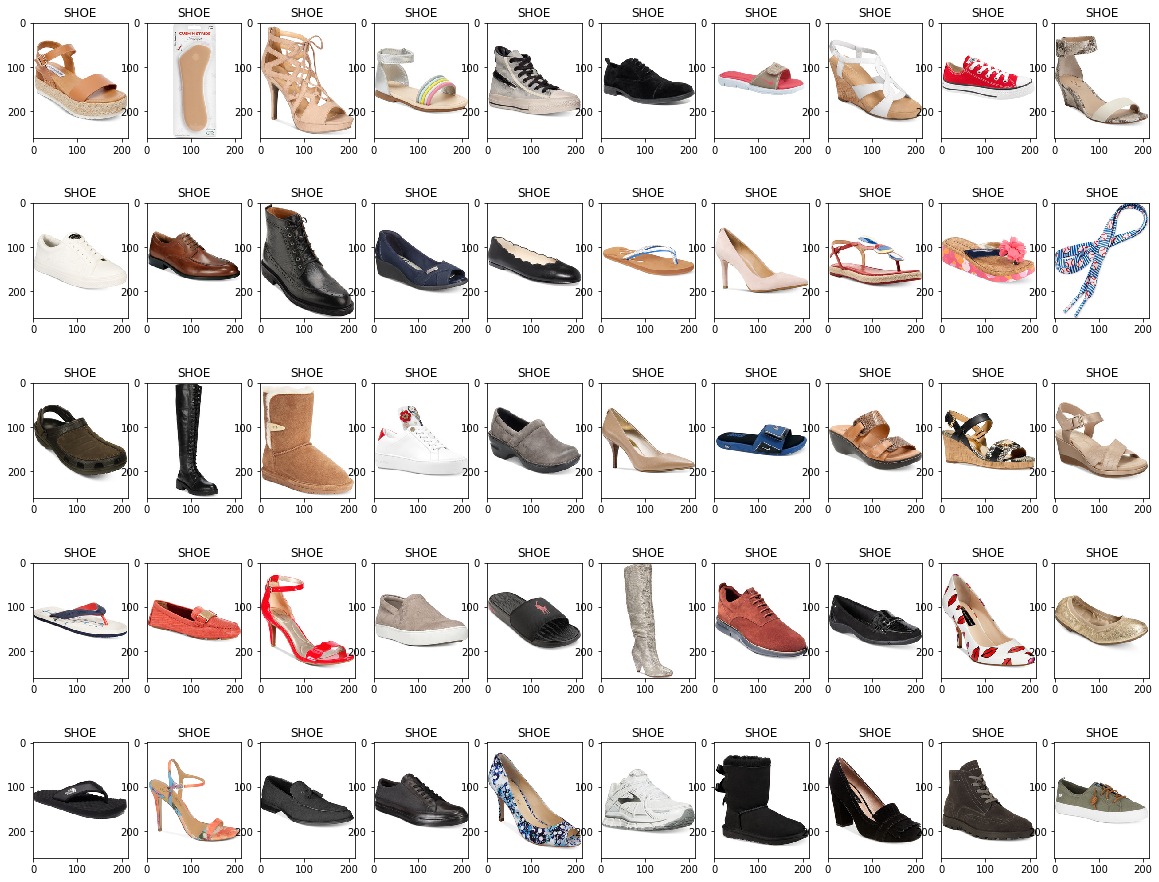

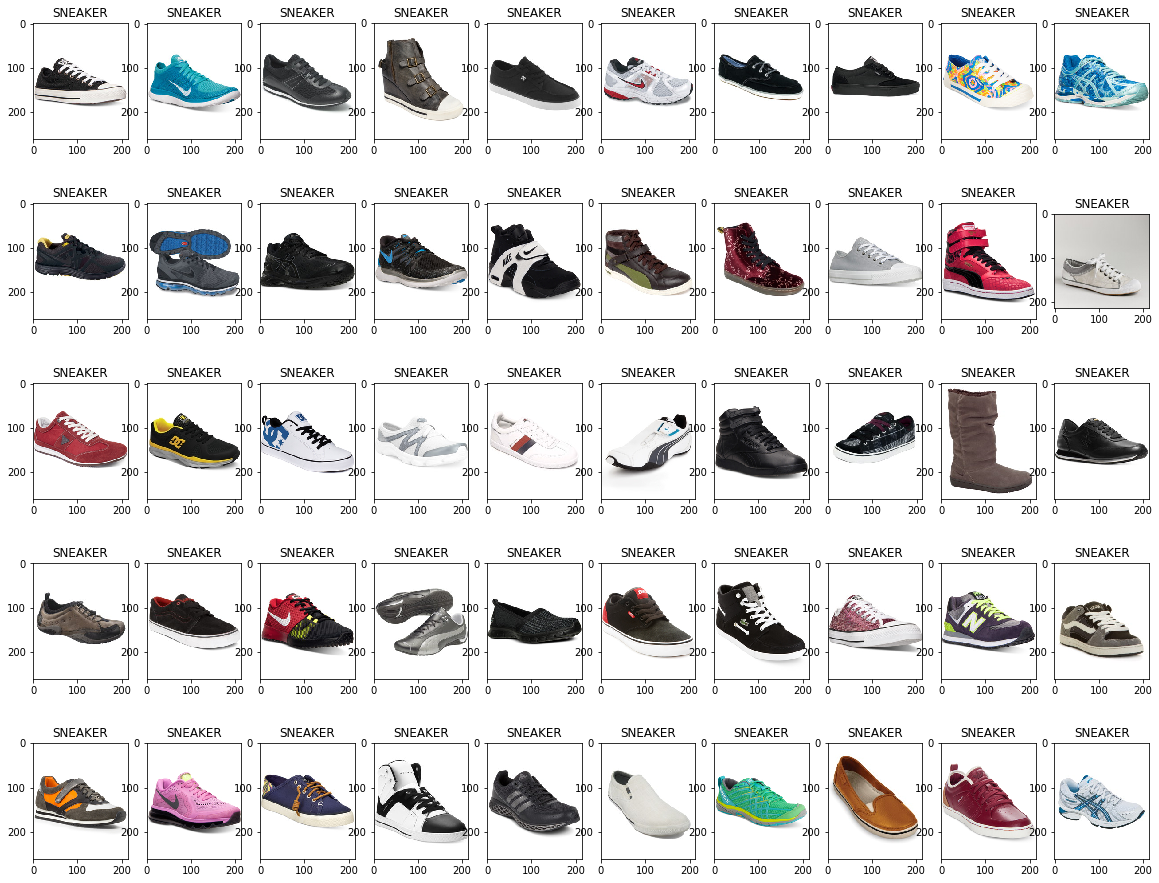

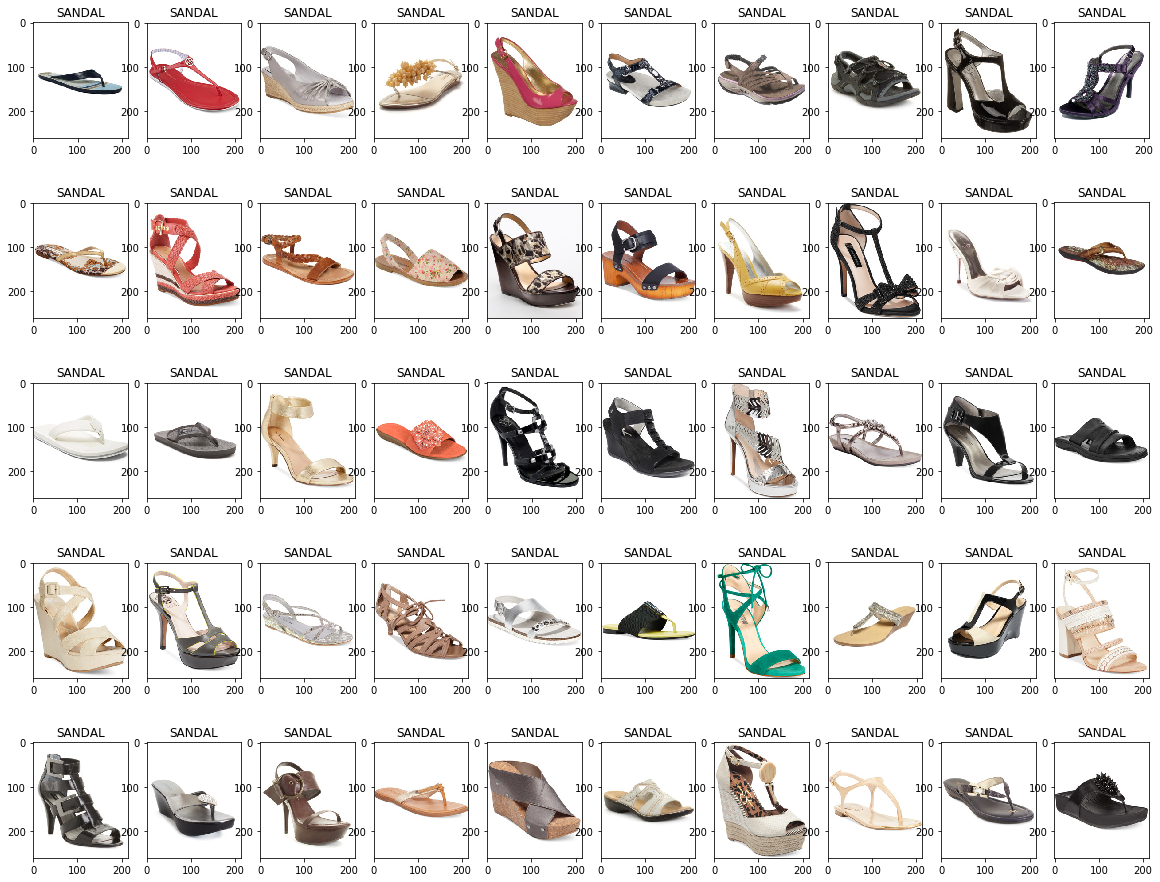

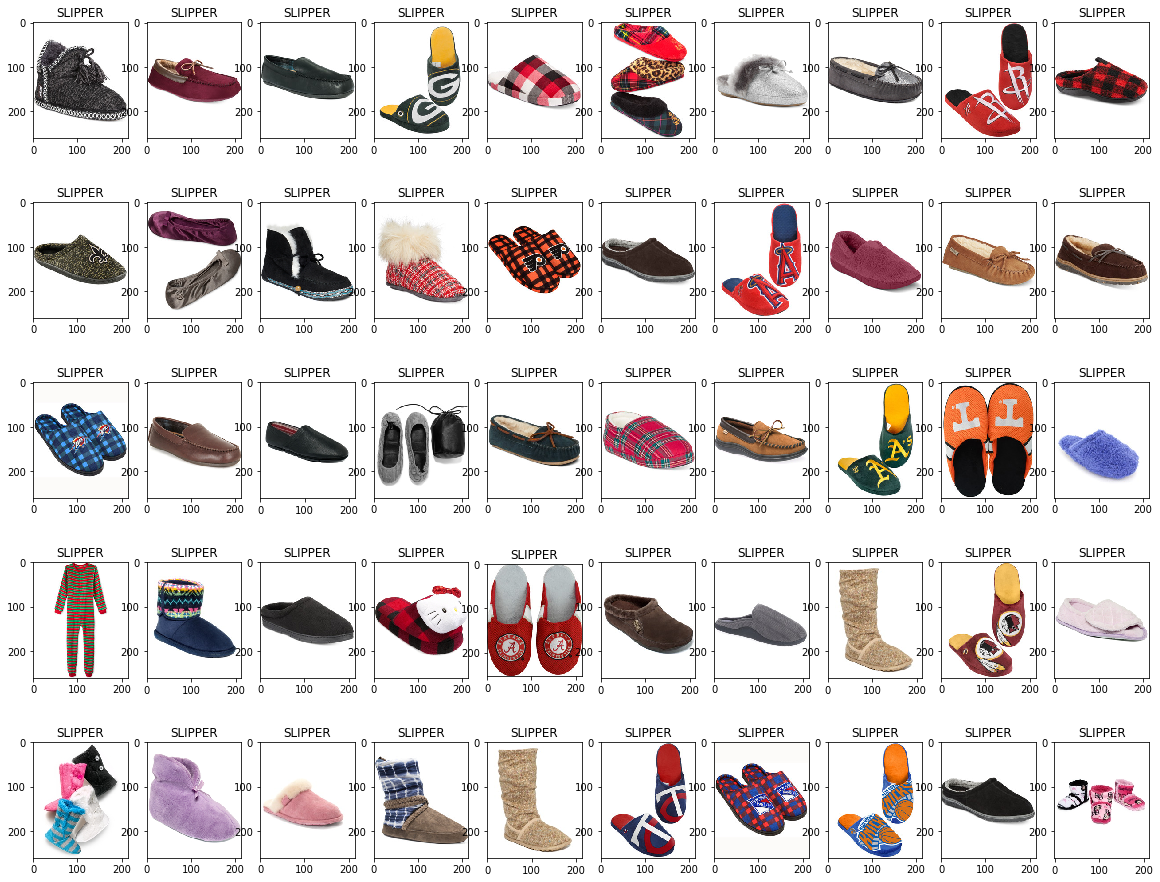

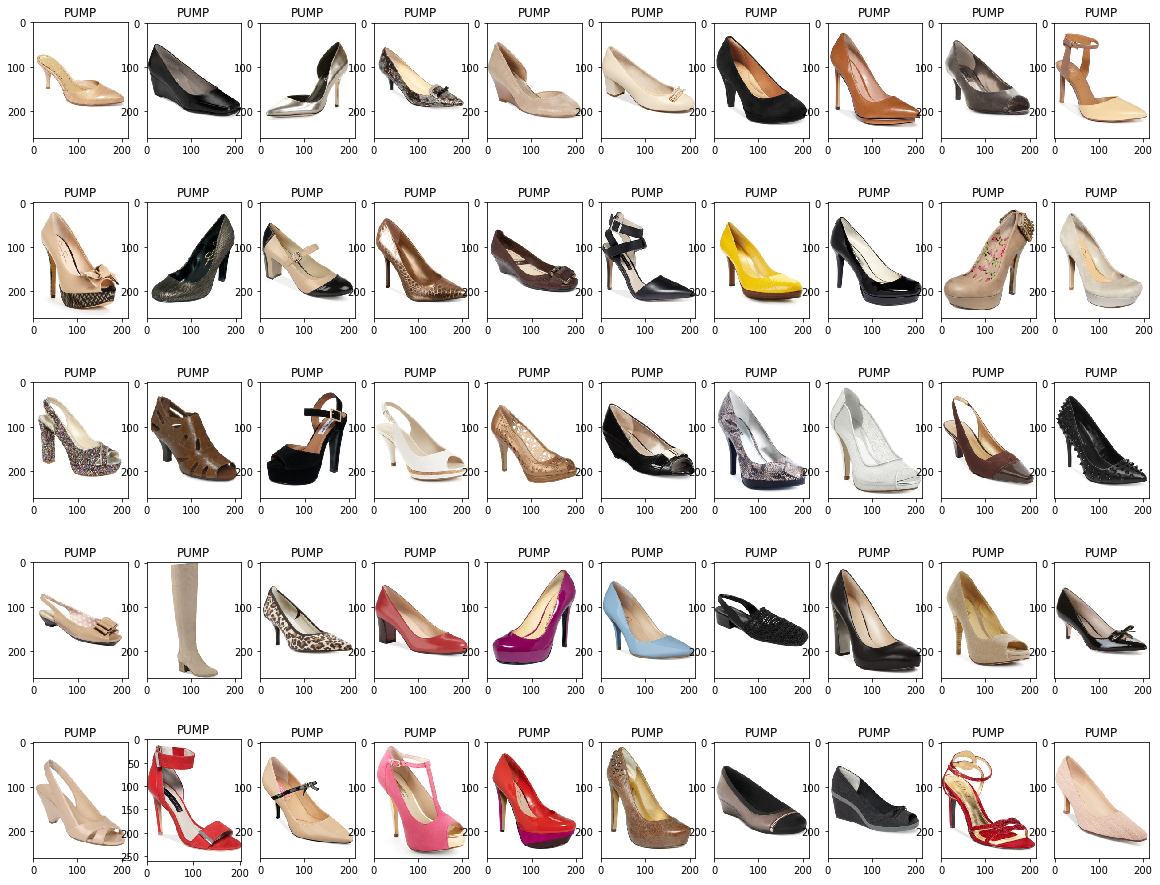

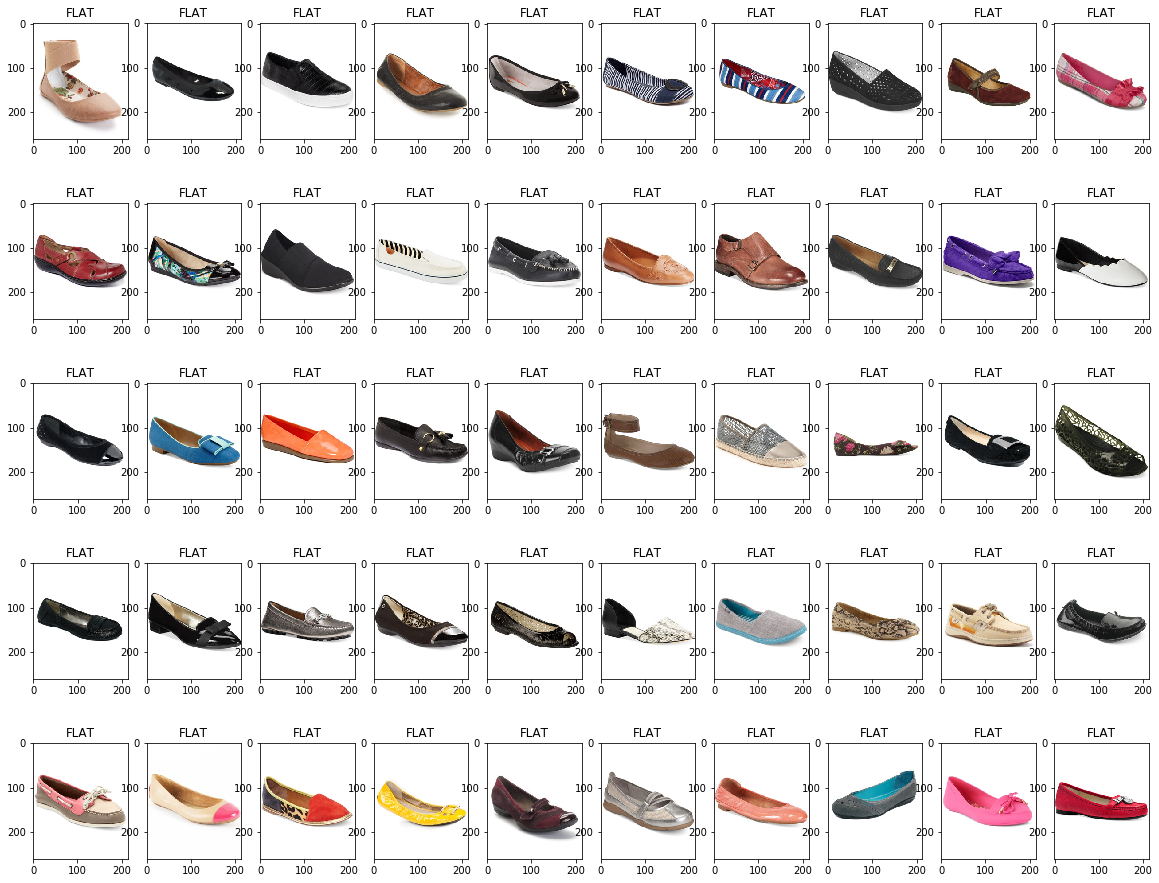

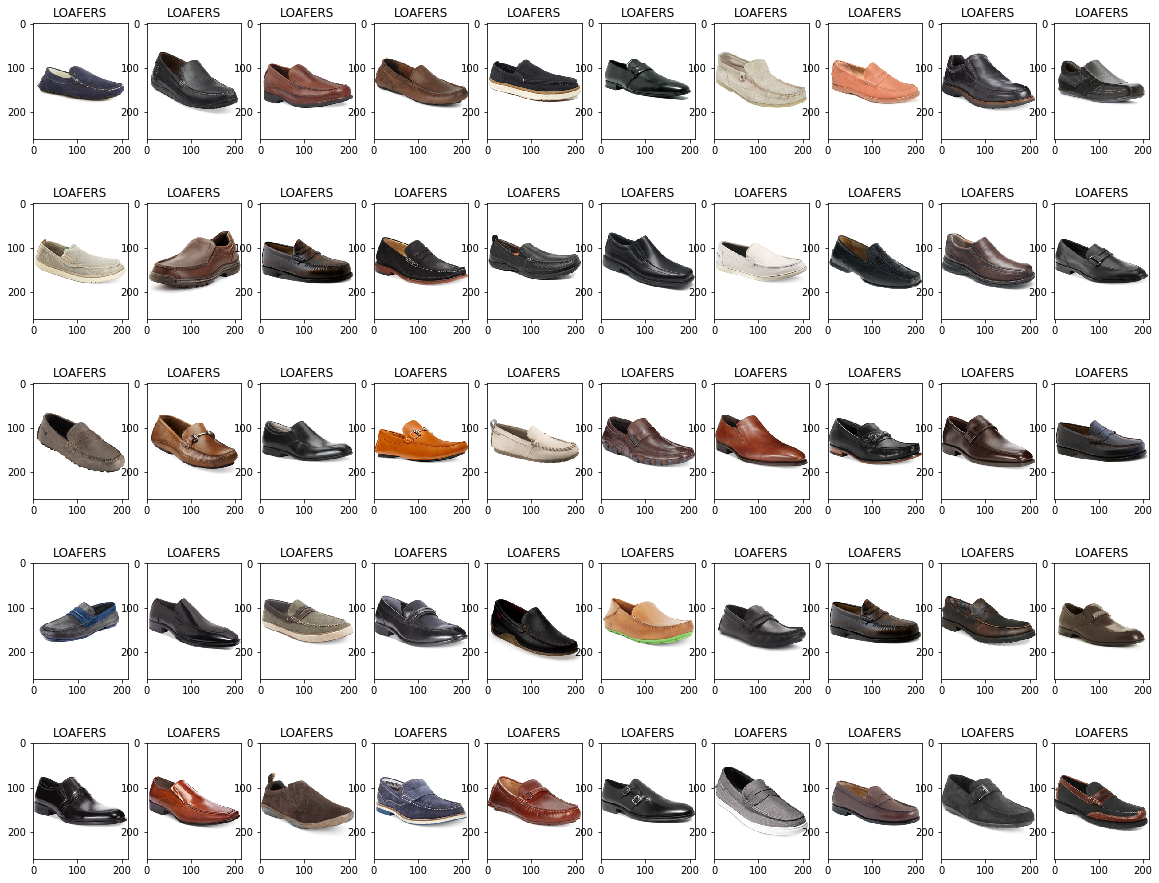

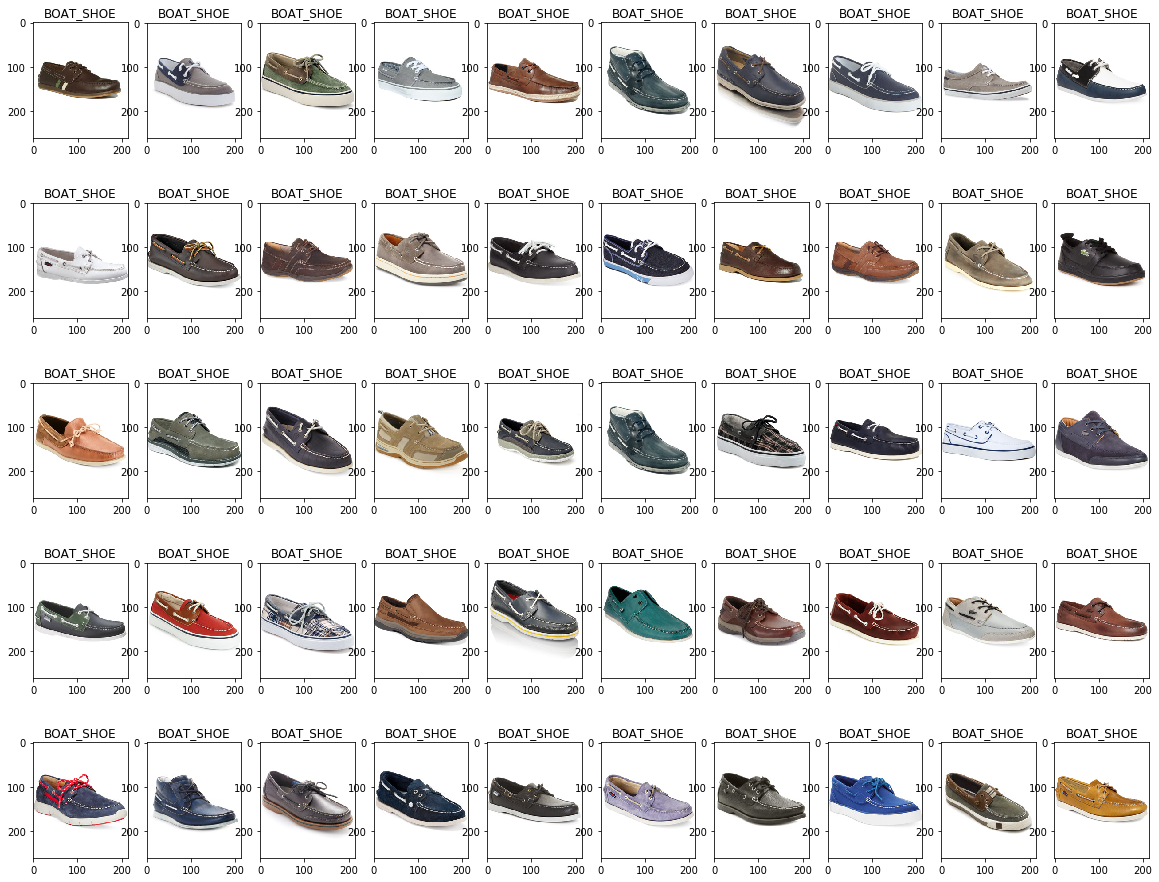

In [9]:
for product_type in KEEP_PRODUCT_TYPES:
    visualize_samples(product_type)


# Visual Conclusions

- SHOE is all mixed up. DROP IT
- ALL_OTHER are okay.
- Let us start with only PUMP

# Only PUMP df

In [15]:
pump_df =  metadata_df[metadata_df["PRODUCT_TYPE"] == 'PUMP']
print(pump_df.index.size)
pump_df.head()

21269


PRODUCT_ID  PRODUCT_COLORWAY_ID  \
IMAGE_FILE                                                 
5/9/5904112_2202602.jpg     5904112              3164506   
5/9/5904112_3756733.jpg     5904112              3164507   
5/9/5904112_3756862.jpg     5904112              3164512   
5/9/5904112_2759039.jpg     5904112              3164514   
5/9/5904112_2981032.jpg     5904112              3164516   

                        COLORWAY_IMAGE_ROLE_TYPE  IMAGE_ID PRODUCT_TYPE  \
IMAGE_FILE                                                                
5/9/5904112_2202602.jpg                     CPRI   2202602         PUMP   
5/9/5904112_3756733.jpg                     CPRI   3756733         PUMP   
5/9/5904112_3756862.jpg                     CPRI   3756862         PUMP   
5/9/5904112_2759039.jpg                     CPRI   2759039         PUMP   
5/9/5904112_2981032.jpg                     CPRI   2981032         PUMP   

                        SIZE_RANGE GENDER  
IMAGE_FILE                                 
5/9/5904112_2202602.jpg    Regular  Women  
5/9/5904112_3756733.jpg    Regular  Women  
5/9/5904112_3756862.jpg    Regular  Women  
5/9/5904112_2759039.jpg    Regular  Women  
5/9/5904112_2981032.jpg    Regular  Women

# Load PRODUCT attribute data (IDM query)

In [16]:
attr_data_file = "/home/jovyan/vmldata/tmp/20181109_vml_dump/attr_query.h5"
product_attr_df = pd.read_hdf(attr_data_file)
product_attr_df.head()

PROD_ID     ATTR_NAME ATTR_VAL
0        9  Color Family    Black
1        9  Color Family     Blue
2        9        NRF_ID        1
3        9        NRF_ID      370
4        9        NRF_ID      401

# Keep rows corresponding to only PUMPs

In [18]:
pump_product_ids = pump_df['PRODUCT_ID']
pump_attributes = product_attr_df.loc[product_attr_df['PROD_ID'].isin(pump_product_ids.tolist())]
pump_attributes.head()

PROD_ID             ATTR_NAME       ATTR_VAL
219887   205818             Age Group          Adult
219888   205818                 Brand      Nine West
219889   205818              Category           Pump
219890   205818  Category of Business        Women's
219891   205818  Category of Business  Women's Shoes

In [23]:
print("total rows", len(pump_attributes))
print("unique PUMPS", len(pump_attributes.PROD_ID.unique())) # these are unique PUMPS

total rows 92638
unique PUMPS 7533


# Collect all PUMP attributes

In [24]:
all_unique_pump_attributes = set(pump_attributes['ATTR_NAME'])
len(all_unique_pump_attributes)

58

# Investigate ATTR_VAL for each ATTR_NAME

In [25]:
def collect_unique_values_for_attribute(attr_name):
    sample_values = pump_attributes.loc[pump_attributes['ATTR_NAME'].isin([attr_name])]
    return set(sample_values['ATTR_VAL'])

for index, attr_name in enumerate(all_unique_pump_attributes):
    print(index, attr_name, collect_unique_values_for_attribute(attr_name), "\n")

0 Fall Activation {'Fall Activation Trend 3', 'Fall Activation Trend 4', 'Fall Activation Trend 2'} 

1 Shoe Trend {'7', '2', '4', '1', '20', '5', '6', '9', '8'} 

2 Shirt Fit {'Classic Fit'} 

3 Fabric {'Cotton', 'Fabric', 'Leather or Suede', 'Polyurethane', 'Leather', 'Denim', 'Faux Leather', 'Polyester', 'Satin', 'Suede'} 

4 Department Type {'Dresses', 'Activewear'} 

5 Boot Height {'Tall', 'Over the Knee', 'Ankle'} 

6 Top Style {'Knit', 'Button Front'} 

7 Trends {'Shades of Red', 'Urban Utility', 'Embellished', 'Vintage', 'The New Nudes'} 

8 Sub Brand {'Kenneth Cole New York', 'Rampage', 'Unlisted by Kenneth Cole', 'Blue by Betsey Johnson', 'MICHAEL Michael Kors', 'Isaac Mizrahi New York', '143 Girl', 'Kenneth Cole Reaction', 'Lauren Ralph Lauren', 'Clarks Artisan'} 

9 Body Care {'Body Lotion'} 

10 RTW Trends {'RTW Trend 10'} 

11 Sleeve Length {'Tank', 'Short Sleeve', 'Long Sleeve'} 

12 Gender {'Women'} 

13 Dress Style {'Sheath'} 

14 Luggage Type {'Duffle'} 

15 Style {'U

In [26]:
ATTR_KEEP_LIST = ['Pump Type', 'Heel', 'Color Family', 'Toe Type']

index = 0
for attr_name in all_unique_pump_attributes:
    if attr_name in ATTR_KEEP_LIST:
        print(index, attr_name, collect_unique_values_for_attribute(attr_name), "\n")
        index += 1

0 Pump Type {'Classic', 'Evening', 'Slingback', "D'Orsay", 'Mary Jane', 'Lace Up', 'Wedge', 'Comfort', 'Peep toe', 'Kitten Heel', 'Block Heel', 'Tailored', 'Platform'} 

1 Heel {'Ultra High 4" & over', 'Low 1-2"', 'Flat 0-1"', 'Mid 2-3"', 'High 3-4"'} 

2 Color Family {'Ivory/Cream', 'Brown', 'Green', 'Black', 'Multi', 'Gold', 'Blue', 'Tan/Beige', 'Gray', 'White', 'Silver', 'Red', 'Pink', 'Yellow', 'Orange', 'Purple'} 

3 Toe Type {'Round', 'Pointy', 'Closed', 'Peep Toe', 'Almond', 'Square'} 



# Flip ROW->COL DF

In [27]:
pump_pivoted = pump_attributes.loc[pump_attributes['ATTR_NAME'].isin(ATTR_KEEP_LIST)]

def dedup_rows(x):
    if len(x) > 1:
        o = set([i for i in x])
        return ', '.join(o)
    else:
        return x
    
aggregations = {
    'ATTR_VAL': dedup_rows
}
pump_pivoted = pump_pivoted.groupby(['PROD_ID', 'ATTR_NAME']).agg(aggregations).reset_index()
pump_pivoted = pump_pivoted.pivot(index='PROD_ID', columns='ATTR_NAME', values='ATTR_VAL')
pump_pivoted.head()

ATTR_NAME Color Family       Heel Pump Type  Toe Type
PROD_ID                                              
205818             NaN   Mid 2-3"   Comfort    Pointy
222133             NaN  High 3-4"       NaN     Round
233763             NaN   Low 1-2"   Comfort    Square
256554             NaN   Mid 2-3"  Peep toe  Peep Toe
258362             NaN   Mid 2-3"       NaN     Round

# Merge image_files with product attributes

In [30]:
pump_df.reset_index(level=0, inplace=True) # make image_file a column
pump_df.head()

IMAGE_FILE  PRODUCT_ID  PRODUCT_COLORWAY_ID  \
0  5/9/5904112_2202602.jpg     5904112              3164506   
1  5/9/5904112_3756733.jpg     5904112              3164507   
2  5/9/5904112_3756862.jpg     5904112              3164512   
3  5/9/5904112_2759039.jpg     5904112              3164514   
4  5/9/5904112_2981032.jpg     5904112              3164516   

  COLORWAY_IMAGE_ROLE_TYPE  IMAGE_ID PRODUCT_TYPE SIZE_RANGE GENDER  
0                     CPRI   2202602         PUMP    Regular  Women  
1                     CPRI   3756733         PUMP    Regular  Women  
2                     CPRI   3756862         PUMP    Regular  Women  
3                     CPRI   2759039         PUMP    Regular  Women  
4                     CPRI   2981032         PUMP    Regular  Women

In [34]:
pump_df_copy = pump_df[['IMAGE_FILE','PRODUCT_ID', 'IMAGE_ID']].copy()
image_names_merged_df = pump_df_copy.merge(pump_pivoted, left_on="PRODUCT_ID", right_on="PROD_ID")
print(len(image_names_merged_df))
image_names_merged_df.tail()

20757


IMAGE_FILE  PRODUCT_ID  IMAGE_ID Color Family  \
20752  6/3/634780_1075192.jpg      634780   1075192          NaN   
20753  6/6/663532_1139405.jpg      663532   1139405          NaN   
20754  7/0/701916_1252177.jpg      701916   1252177          NaN   
20755   3/9/397207_495684.jpg      397207    495684          NaN   
20756   3/9/398902_662774.jpg      398902    662774          NaN   

                       Heel Pump Type  Toe Type  
20752  Ultra High 4" & over  Peep toe  Peep Toe  
20753             High 3-4"   Classic     Round  
20754  Ultra High 4" & over  Platform     Round  
20755                   NaN       NaN    Pointy  
20756                   NaN       NaN    Pointy

# Analyze NaN & None in different columns

### Observations:

- COLOR - we will use Alex's model. Hence ignore it here
- Toe Type - 198/20757 are NaN
- Pump Type - 3429/20757 are NaN
- Heel - 3195/20757 are NaN

In [44]:
# filter out nans
tmp = image_names_merged_df[image_names_merged_df.loc[:, "Heel"].isnull() == True]
print(len(tmp))

3195


# Save cleaned csv

In [61]:
# Toe Type
tmp = image_names_merged_df[image_names_merged_df.loc[:, "Toe Type"].isnull() == False][['IMAGE_FILE', 'Toe Type']]
tmp.to_csv("Shoes_Pump_ToeType.csv", sep=',')
print("Toe Type - Saved", len(tmp))

# Pump Type
tmp = image_names_merged_df[image_names_merged_df.loc[:, "Pump Type"].isnull() == False][['IMAGE_FILE', 'Pump Type']]
tmp.to_csv("Shoes_Pump_PumpType.csv", sep=',')
print("Pump Type - Saved", len(tmp))

# Heel
tmp = image_names_merged_df[image_names_merged_df.loc[:, "Heel"].isnull() == False][['IMAGE_FILE', 'Heel']]
tmp.to_csv("Shoes_Pump_Heel.csv", sep=',')
print("Heel - Saved", len(tmp))

Toe Type - Saved 20559
Pump Type - Saved 17328
Heel - Saved 17562
